## Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
#import io
from scipy import stats
from scipy.stats import kendalltau
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
import pandas as pd

# Load dataset while skipping problematic lines
df = pd.read_csv('Final dataset of germany.csv', on_bad_lines='skip')

df.head()

,STATIONS_ID,Station_name,Year,QN_4,JA_N,JA_TT,TXn,TNn,JA_FK,JA_SD_S,JA_MX_FX,TXx,TNx,QN_6,PRCPTOT,JA_MX_RS,JA_NSH,JA_SH_S
0,19579,Bonndorf,1971,5.0,4.59,6.75,11.48,2.84,1.33,1426.8,-999.0,31.0,-17.4,5,679.6,44.8,NaN,NaN
1,19579,Bonndorf,1972,5.0,4.98,6.31,10.81,2.74,1.37,1343.4,-999.0,28.2,-12.1,5,840.8,52.7,NaN,NaN
2,19579,Bonndorf,1973,5.0,5.16,6.31,10.58,2.51,1.34,1262.5,-999.0,27.1,-18.7,5,920.6,55.7,NaN,NaN
3,19579,Bonndorf,1974,5.0,5.85,6.99,10.87,3.51,1.27,1034.0,-999.0,31.3,-10.4,5,930.2,35.7,NaN,NaN
4,19579,Bonndorf,1975,5.0,5.28,7.03,11.20,3.34,1.13,1219.6,-999.0,29.5,-14.1,5,976.9,38.1,NaN,NaN


## Understanding the dataset

In [4]:
df.columns

Index(['STATIONS_ID', 'Station_name', 'Year', 'QN_4', 'JA_N', 'JA_TT', 'TXn',
       'TNn', 'JA_FK', 'JA_SD_S', 'JA_MX_FX', 'TXx', 'TNx', 'QN_6', 'PRCPTOT',
       'JA_MX_RS', 'JA_NSH', 'JA_SH_S'],
      dtype='object')

In [5]:
df['Station_name'].unique()

array(['Bonndorf', 'Arnis', 'Berlin Brandenburg', ..., 'Berka',
       'Hartmannsdorf-Reichenau', 'Mömbris-Niedersteinbach'], dtype=object)

In [6]:
df.describe()

,STATIONS_ID,Year,QN_4,JA_N,JA_TT,TXn,TNn,JA_FK,JA_SD_S,JA_MX_FX,TXx,TNx,QN_6,PRCPTOT,JA_MX_RS,JA_NSH,JA_SH_S
count,437423.000000,437423.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,59321.000000,437423.000000,437423.000000,437423.000000,378102.000000,378102.000000
mean,3378.962851,1963.272999,-48.642268,-402.058066,-81.520885,-127.964446,-137.029250,-385.413291,-118.774713,-902.582612,-256.995745,-291.332172,-8.524202,769.443989,-186.565896,-651.193665,-208.758026
std,2938.901932,34.221232,228.597430,493.153242,287.413874,350.143380,349.273409,487.651598,1246.006422,299.644156,463.217617,442.348985,120.795890,379.117655,428.344086,507.025137,1622.670585
min,1.000000,1719.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1550.000000,1940.000000,5.000000,-999.000000,7.270000,11.040000,2.830000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,5.000000,604.400000,20.000000,-999.000000,-999.000000
50%,3054.000000,1967.000000,5.000000,4.950000,8.490000,12.610000,4.320000,1.500000,-999.000000,-999.000000,31.000000,-17.300000,5.000000,737.400000,31.100000,-999.000000,-999.000000
75%,4575.000000,1990.000000,10.000000,5.430000,9.450000,13.770000,5.370000,2.250000,1493.100000,-999.000000,33.300000,-12.700000,9.000000,909.700000,42.200000,18.000000,196.000000
max,19764.000000,2023.000000,10.000000,7.470000,13.140000,18.430000,9.710000,6.710000,2355.300000,93.000000,41.200000,1.100000,10.000000,3503.100000,312.000000,2780.000000,129873.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437423 entries, 0 to 437422
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATIONS_ID   437423 non-null  int64  
 1   Station_name  436865 non-null  object 
 2   Year          437423 non-null  int64  
 3   QN_4          59321 non-null   float64
 4   JA_N          59321 non-null   float64
 5   JA_TT         59321 non-null   float64
 6   TXn           59321 non-null   float64
 7   TNn           59321 non-null   float64
 8   JA_FK         59321 non-null   float64
 9   JA_SD_S       59321 non-null   float64
 10  JA_MX_FX      59321 non-null   float64
 11  TXx           59321 non-null   float64
 12  TNx           59321 non-null   float64
 13  QN_6          437423 non-null  int64  
 14  PRCPTOT       437423 non-null  float64
 15  JA_MX_RS      437423 non-null  float64
 16  JA_NSH        378102 non-null  float64
 17  JA_SH_S       378102 non-null  float64
dtypes: f

In [8]:
df.shape

(437423, 18)

## 2.Data Preparation

In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 STATIONS_ID          0
Station_name       558
Year                 0
QN_4            378102
JA_N            378102
JA_TT           378102
TXn             378102
TNn             378102
JA_FK           378102
JA_SD_S         378102
JA_MX_FX        378102
TXx             378102
TNx             378102
QN_6                 0
PRCPTOT              0
JA_MX_RS             0
JA_NSH           59321
JA_SH_S          59321
dtype: int64


Handling Missing values of the column TXx by imputation method

In [10]:
# Impute missing values with the mean
mean_TXx = df['TXx'].mean()
df['TXx'].fillna(mean_TXx, inplace=True)


In [11]:
df['TXx'].isnull().sum()

0

In [12]:
df['TXx']

0          31.000000
1          28.200000
2          27.100000
3          31.300000
4          29.500000
             ...    
437418   -256.995745
437419   -256.995745
437420   -256.995745
437421   -256.995745
437422   -256.995745
Name: TXx, Length: 437423, dtype: float64

In [13]:
# Loading the dataset containing the informations of direction
df1 = pd.read_csv('Stations_with_Directions.csv')

df1.head()

,Stations_id,Stationsname,Latitude,Longitude,Direction
0,1,Aach,47.8413,8.8493,South-west
1,2,Aachen (Kläranlage),50.8066,6.0996,North-west
2,3,Aachen,50.7827,6.0941,North-west
3,4,Aachen-Brand,50.7683,6.1207,North-west
4,6,Aalen-Unterrombach,48.8361,10.0598,South-west


In [14]:
df1.columns

Index(['Stations_id', 'Stationsname', 'Latitude', 'Longitude', 'Direction'], dtype='object')

In [15]:

# Assuming df1 is the first dataframe and df2 is the second dataframe

# Rename the 'Station_name' column in df1 to match the 'Stationsname' column in df2
df1.rename(columns={'Station_name': 'Stationsname'}, inplace=True)

# Perform the merge based on the 'Stationsname' column
merged_df = pd.merge(df, df1, left_on='Station_name', right_on='Stationsname', how='inner')

# Check the result
print(merged_df.head())


   STATIONS_ID Station_name  Year  QN_4  JA_N  JA_TT    TXn   TNn  JA_FK  \
0        19579     Bonndorf  1971   5.0  4.59   6.75  11.48  2.84   1.33   
1        19579     Bonndorf  1971   5.0  4.59   6.75  11.48  2.84   1.33   
2        19579     Bonndorf  1972   5.0  4.98   6.31  10.81  2.74   1.37   
3        19579     Bonndorf  1972   5.0  4.98   6.31  10.81  2.74   1.37   
4        19579     Bonndorf  1973   5.0  5.16   6.31  10.58  2.51   1.34   

   JA_SD_S  ...  QN_6  PRCPTOT  JA_MX_RS  JA_NSH  JA_SH_S  Stations_id  \
0   1426.8  ...     5    679.6      44.8     NaN      NaN        19579   
1   1426.8  ...     5    679.6      44.8     NaN      NaN        19579   
2   1343.4  ...     5    840.8      52.7     NaN      NaN        19579   
3   1343.4  ...     5    840.8      52.7     NaN      NaN        19579   
4   1262.5  ...     5    920.6      55.7     NaN      NaN        19579   

   Stationsname  Latitude  Longitude   Direction  
0      Bonndorf   47.8194     8.3348  South-wes

In [16]:

# Check if the 'Station_name' and 'Stationsname' columns are identical
if (merged_df['Station_name'] == merged_df['Stationsname']).all():
    # Drop one of the redundant columns (e.g., 'Stationsname')
    merged_df.drop(columns=['Stationsname'], inplace=True)
else:
    print("Warning: 'Station_name' and 'Stationsname' columns have different values.")

# Optionally, rename 'Station_name' to something simpler if needed
# merged_df.rename(columns={'Station_name': 'Station'}, inplace=True)

# Check the result
print(merged_df.head())


   STATIONS_ID Station_name  Year  QN_4  JA_N  JA_TT    TXn   TNn  JA_FK  \
0        19579     Bonndorf  1971   5.0  4.59   6.75  11.48  2.84   1.33   
1        19579     Bonndorf  1971   5.0  4.59   6.75  11.48  2.84   1.33   
2        19579     Bonndorf  1972   5.0  4.98   6.31  10.81  2.74   1.37   
3        19579     Bonndorf  1972   5.0  4.98   6.31  10.81  2.74   1.37   
4        19579     Bonndorf  1973   5.0  5.16   6.31  10.58  2.51   1.34   

   JA_SD_S  ...   TNx  QN_6  PRCPTOT  JA_MX_RS  JA_NSH  JA_SH_S  Stations_id  \
0   1426.8  ... -17.4     5    679.6      44.8     NaN      NaN        19579   
1   1426.8  ... -17.4     5    679.6      44.8     NaN      NaN        19579   
2   1343.4  ... -12.1     5    840.8      52.7     NaN      NaN        19579   
3   1343.4  ... -12.1     5    840.8      52.7     NaN      NaN        19579   
4   1262.5  ... -18.7     5    920.6      55.7     NaN      NaN        19579   

   Latitude  Longitude   Direction  
0   47.8194     8.3348  S

In [17]:


# Function to find outliers using the IQR method
def find_outliers_iqr(df, columns):
    outliers_summary = {}

    for column in columns:
        if df[column].dtype != 'O':  # Ensure column is numeric
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers_count = outliers.shape[0]
            outliers_summary[column] = outliers_count

    return outliers_summary

# List of numeric columns in the merged_df dataset
numeric_columns = ['Year', 'JA_N', 'JA_TT', 'TXn', 'TNn', 'JA_FK', 'JA_SD_S',
                   'JA_MX_FX', 'TXx', 'TNx', 'PRCPTOT', 'JA_MX_RS', 'JA_NSH', 'JA_SH_S']

# Find outliers in merged_df
outliers_summary = find_outliers_iqr(merged_df, numeric_columns)

# Print the outliers summary vertically
for column, count in outliers_summary.items():
    print(f"Column: {column}\nOutliers Count: {count}\n{'-'*30}")



Column: Year
Outliers Count: 2482
------------------------------
Column: JA_N
Outliers Count: 0
------------------------------
Column: JA_TT
Outliers Count: 10608
------------------------------
Column: TXn
Outliers Count: 15322
------------------------------
Column: TNn
Outliers Count: 14640
------------------------------
Column: JA_FK
Outliers Count: 0
------------------------------
Column: JA_SD_S
Outliers Count: 0
------------------------------
Column: JA_MX_FX
Outliers Count: 9590
------------------------------
Column: TXx
Outliers Count: 104279
------------------------------
Column: TNx
Outliers Count: 0
------------------------------
Column: PRCPTOT
Outliers Count: 39396
------------------------------
Column: JA_MX_RS
Outliers Count: 133277
------------------------------
Column: JA_NSH
Outliers Count: 85
------------------------------
Column: JA_SH_S
Outliers Count: 13453
------------------------------


In [1]:
def plot_outliers_boxplot(df, columns):
    plt.figure(figsize=(15, 20)) 


    for i, column in enumerate(columns, 1):
        if df[column].dtype != 'O':  
            plt.subplot((len(columns) + 1) // 2, 2, i)  
            sns.boxplot(x=df[column])
            plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()


numeric_columns = ['Year', 'JA_N', 'JA_TT', 'TXn', 'TNn', 'JA_FK', 'JA_SD_S',
                   'JA_MX_FX', 'TXx', 'TNx', 'PRCPTOT', 'JA_MX_RS', 'JA_NSH', 'JA_SH_S']


plot_outliers_boxplot(merged_df, numeric_columns)


NameError: name 'merged_df' is not defined

In [19]:
import pandas as pd

# Function to find and remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    if df[column].dtype != 'O':  # Ensure column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out the outliers
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        return df_filtered

# List of numeric columns
numeric_columns = ['Year', 'JA_N', 'JA_TT', 'TXn', 'TNn', 'JA_FK', 'JA_SD_S',
                   'JA_MX_FX', 'TXx', 'TNx', 'PRCPTOT', 'JA_MX_RS', 'JA_NSH', 'JA_SH_S']

# Remove outliers from PRCPTOT
cleaned_df = remove_outliers_iqr(merged_df, 'PRCPTOT')

# Print the shape of the DataFrame before and after removing outliers in PRCPTOT
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers in PRCPTOT: {cleaned_df.shape}")

# Now `cleaned_df` is your DataFrame without outliers in the `PRCPTOT` column.



Original DataFrame shape: (437423, 18)
DataFrame shape after removing outliers in PRCPTOT: (499675, 22)


In [20]:
cleaned_df.head()

,STATIONS_ID,Station_name,Year,QN_4,JA_N,JA_TT,TXn,TNn,JA_FK,JA_SD_S,...,TNx,QN_6,PRCPTOT,JA_MX_RS,JA_NSH,JA_SH_S,Stations_id,Latitude,Longitude,Direction
0,19579,Bonndorf,1971,5.0,4.59,6.75,11.48,2.84,1.33,1426.8,...,-17.4,5,679.6,44.8,NaN,NaN,19579,47.8194,8.3348,South-west
1,19579,Bonndorf,1971,5.0,4.59,6.75,11.48,2.84,1.33,1426.8,...,-17.4,5,679.6,44.8,NaN,NaN,19579,47.8194,8.3348,South-west
2,19579,Bonndorf,1972,5.0,4.98,6.31,10.81,2.74,1.37,1343.4,...,-12.1,5,840.8,52.7,NaN,NaN,19579,47.8194,8.3348,South-west
3,19579,Bonndorf,1972,5.0,4.98,6.31,10.81,2.74,1.37,1343.4,...,-12.1,5,840.8,52.7,NaN,NaN,19579,47.8194,8.3348,South-west
4,19579,Bonndorf,1973,5.0,5.16,6.31,10.58,2.51,1.34,1262.5,...,-18.7,5,920.6,55.7,NaN,NaN,19579,47.8194,8.3348,South-west


In [21]:
# Drop the 'Stations_id' column and keep 'STATIONS_ID'
cleaned_df = cleaned_df.drop(columns=['Stations_id'])


In [22]:
cleaned_df.shape

(499675, 21)

In [23]:
cleaned_df.columns

Index(['STATIONS_ID', 'Station_name', 'Year', 'QN_4', 'JA_N', 'JA_TT', 'TXn',
       'TNn', 'JA_FK', 'JA_SD_S', 'JA_MX_FX', 'TXx', 'TNx', 'QN_6', 'PRCPTOT',
       'JA_MX_RS', 'JA_NSH', 'JA_SH_S', 'Latitude', 'Longitude', 'Direction'],
      dtype='object')

In [24]:
# Save the DataFrame to a CSV file
cleaned_df.to_csv('Germandata.csv', index=False)

In [25]:
cleaned_df['Direction'].unique()

array(['South-west', 'North-west', 'North-east', 'South-east'],
      dtype=object)

In [26]:

numerical_columns = cleaned_df.select_dtypes(include=['number']).columns

print(numerical_columns)


Index(['STATIONS_ID', 'Year', 'QN_4', 'JA_N', 'JA_TT', 'TXn', 'TNn', 'JA_FK',
       'JA_SD_S', 'JA_MX_FX', 'TXx', 'TNx', 'QN_6', 'PRCPTOT', 'JA_MX_RS',
       'JA_NSH', 'JA_SH_S', 'Latitude', 'Longitude'],
      dtype='object')


## Exploratory Data Analysis

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

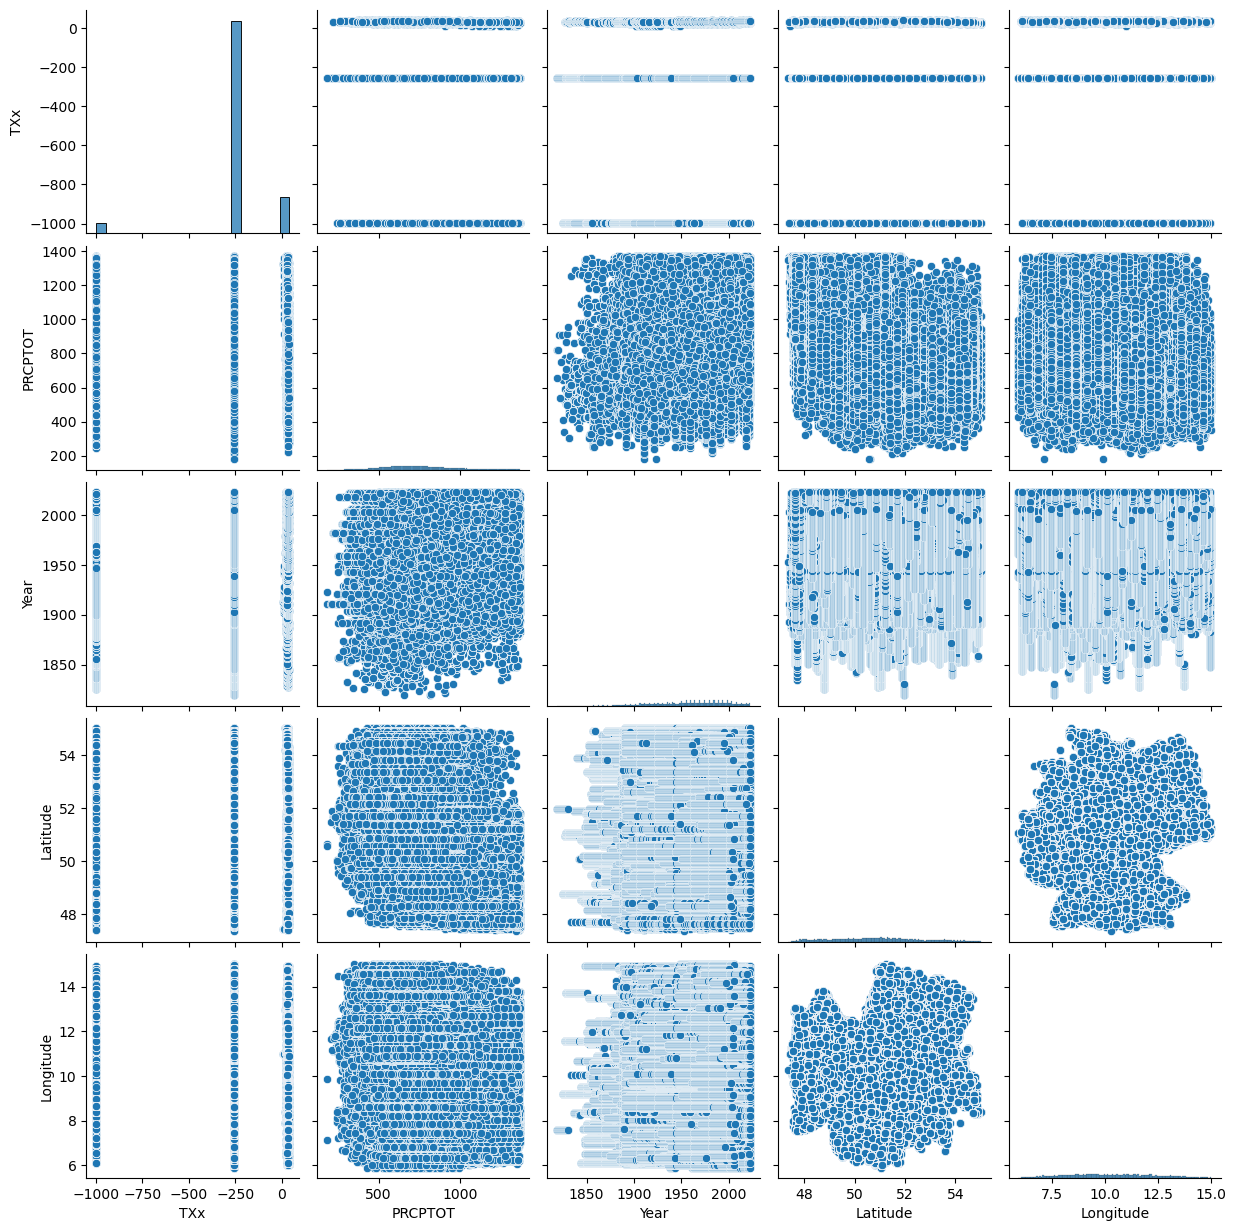

In [27]:
sns.pairplot(cleaned_df[['TXx', 'PRCPTOT', 'Year', 'Latitude', 'Longitude']])
plt.show()


In [28]:

# Assuming your cleaned DataFrame is named 'cleaned_df'
# Load the relevant columns for analysis
df = cleaned_df[['TXx', 'PRCPTOT']]

# 1. Summary Statistics
print(df.describe())



                 TXx        PRCPTOT
count  499675.000000  499675.000000
mean     -246.493525     756.893653
std       183.175512     209.291342
min      -999.000000     178.900000
25%      -256.995745     605.700000
50%      -256.995745     729.300000
75%      -256.995745     880.100000
max        41.200000    1369.800000


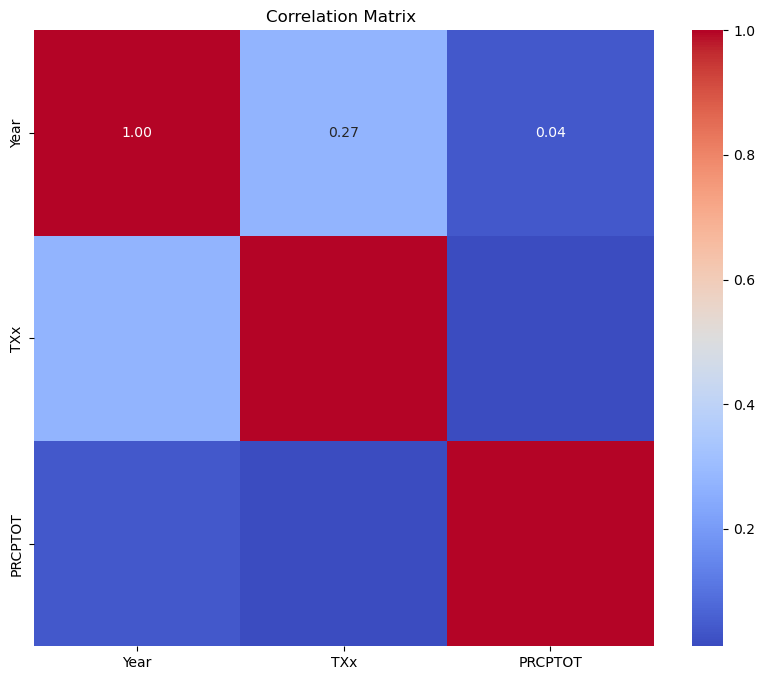

In [29]:

# Include 'year' in the DataFrame
extended_df = cleaned_df[['Year', 'TXx', 'PRCPTOT']]

# Compute the correlation matrix
correlation_matrix = extended_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')
plt.show()




In [30]:
cleaned_df.columns

Index(['STATIONS_ID', 'Station_name', 'Year', 'QN_4', 'JA_N', 'JA_TT', 'TXn',
       'TNn', 'JA_FK', 'JA_SD_S', 'JA_MX_FX', 'TXx', 'TNx', 'QN_6', 'PRCPTOT',
       'JA_MX_RS', 'JA_NSH', 'JA_SH_S', 'Latitude', 'Longitude', 'Direction'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cleaned_df['Direction'] = cleaned_df['Station_name'].map(station_to_region)
annual_precip_by_region = cleaned_df.groupby(['Direction', 'Year'])['PRCPTOT'].sum().reset_index()
precip_by_region_pivot = annual_precip_by_region.pivot(index='Year', columns='Direction', values='PRCPTOT')
fig, ax = plt.subplots(figsize=(12, 8))
for region in precip_by_region_pivot.columns:
    ax.plot(precip_by_region_pivot.index, precip_by_region_pivot[region], marker='o', label=region)

ax.set_title('Annual Precipitation Trends by Region')
ax.set_xlabel('Year')
ax.set_ylabel('Total Precipitation (mm)')
ax.legend(title='Region')
ax.grid(True)

plt.tight_layout()
plt.show()


In [97]:

precipitation_column = 'PRCPTOT'
temperature_column = 'TXx'

station_avg_by_year = cleaned_df.groupby(['Station_name', 'Year'])[[precipitation_column, temperature_column]].mean().reset_index()

station_avg_by_year.columns = ['Station', 'Year', 'Avg Max Precipitation', 'Avg Max Temp']

print(station_avg_by_year.head())


  Station  Year  Avg Max Precipitation  Avg Max Temp
0    Aach  1891                  694.0   -256.995745
1    Aach  1892                  720.0   -256.995745
2    Aach  1893                  696.0   -256.995745
3    Aach  1894                  740.0   -256.995745
4    Aach  1895                  733.0   -256.995745


In [98]:
station_avg_by_year['Station'].unique()

array(['Aach', 'Aachen', 'Aachen (Kläranlage)', ...,
       'Überlingen/Bodensee', 'Übersee-Feldwies', 'Ühlingen-Birkendorf'],
      dtype=object)

In [99]:
precipitation_column = 'PRCPTOT'
temperature_column = 'TXx'

regional_avg_by_year = cleaned_df.groupby(['Direction', 'Year'])[[precipitation_column, temperature_column]].mean().reset_index()

regional_avg_by_year.columns = ['Region', 'Year', 'Avg Max Precipitation', 'Avg Max Temp']

print(regional_avg_by_year)


         Region  Year  Avg Max Precipitation  Avg Max Temp
0    North-east  1827             589.900000   -111.947873
1    North-east  1828             768.150000   -112.397873
2    North-east  1829             534.750000   -111.672873
3    North-east  1830             631.850000   -111.447873
4    North-east  1831             615.200000   -114.522873
..          ...   ...                    ...           ...
763  South-west  2019             798.466804   -177.382492
764  South-west  2020             717.101163   -175.793956
765  South-west  2021             841.841402   -174.312437
766  South-west  2022             749.296543   -173.086722
767  South-west  2023             904.524324   -185.673119

[768 rows x 4 columns]


In [100]:

regional_avg_by_year.to_csv('GermanAnalysis.csv', index=False)

In [101]:
# Group data by 'Region' to calculate the overall average for 'Avg Max Temp'
avg_max_temp_by_region = regional_avg_by_year.groupby('Region')['Avg Max Temp'].mean().reset_index()

# Rename the column to match the format you're looking for
avg_max_temp_by_region.columns = ['Region', 'Avg Max Temp']

# Display the result
print(avg_max_temp_by_region)


       Region  Avg Max Temp
0  North-east   -255.947221
1  North-west   -322.422004
2  South-east   -302.861777
3  South-west   -342.539007


In [102]:
# Group data by 'Region' to calculate the overall average for 'Avg Max Precipitation'
avg_max_precipitation_by_region = regional_avg_by_year.groupby('Region')['Avg Max Precipitation'].mean().reset_index()

# Rename the column to match the desired format
avg_max_precipitation_by_region.columns = ['Region', 'Avg Precipitation']

# Display the result
print(avg_max_precipitation_by_region)


       Region  Avg Precipitation
0  North-east         607.951707
1  North-west         766.052560
2  South-east         818.632216
3  South-west         779.854544


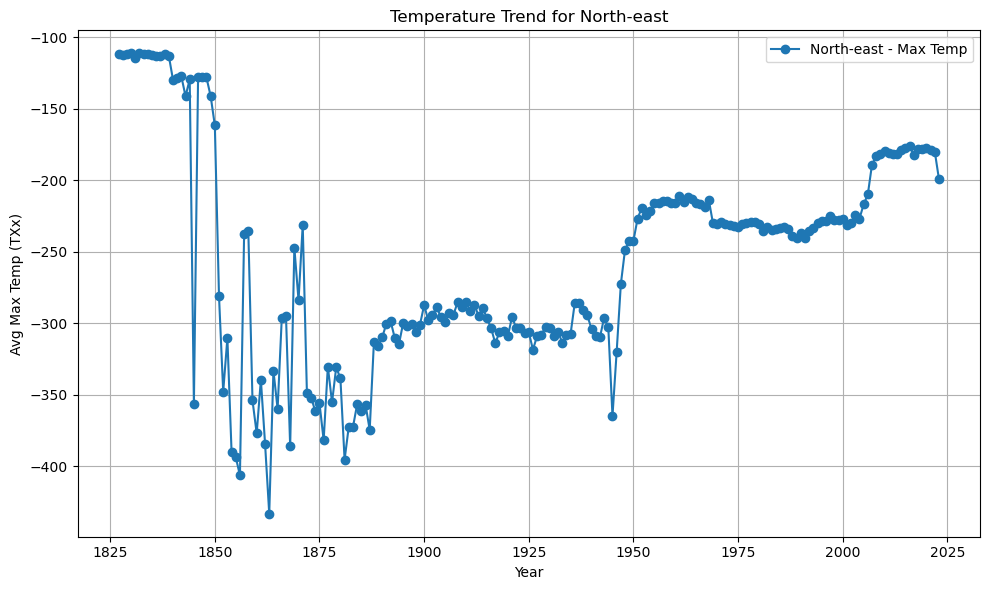

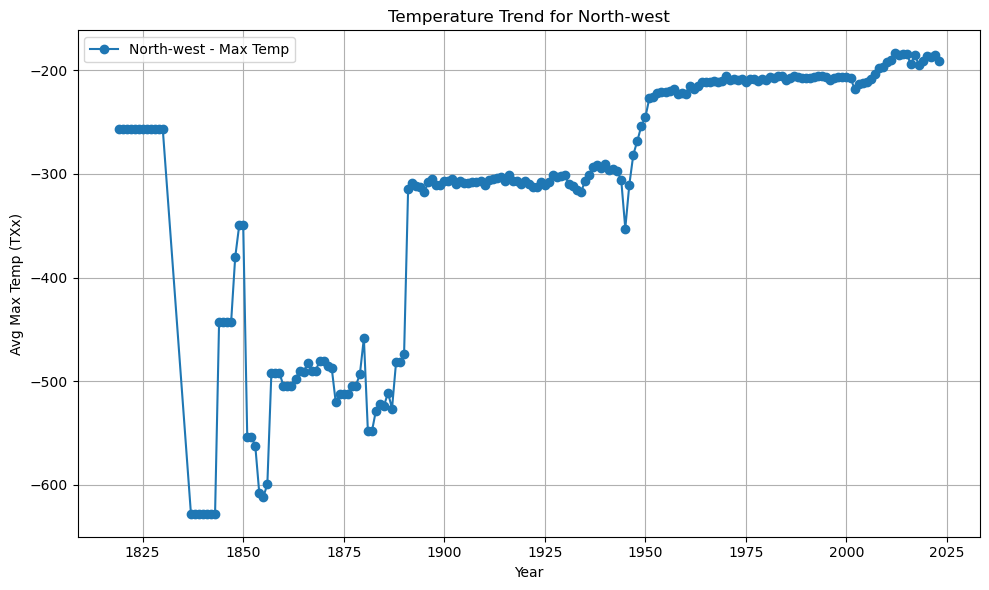

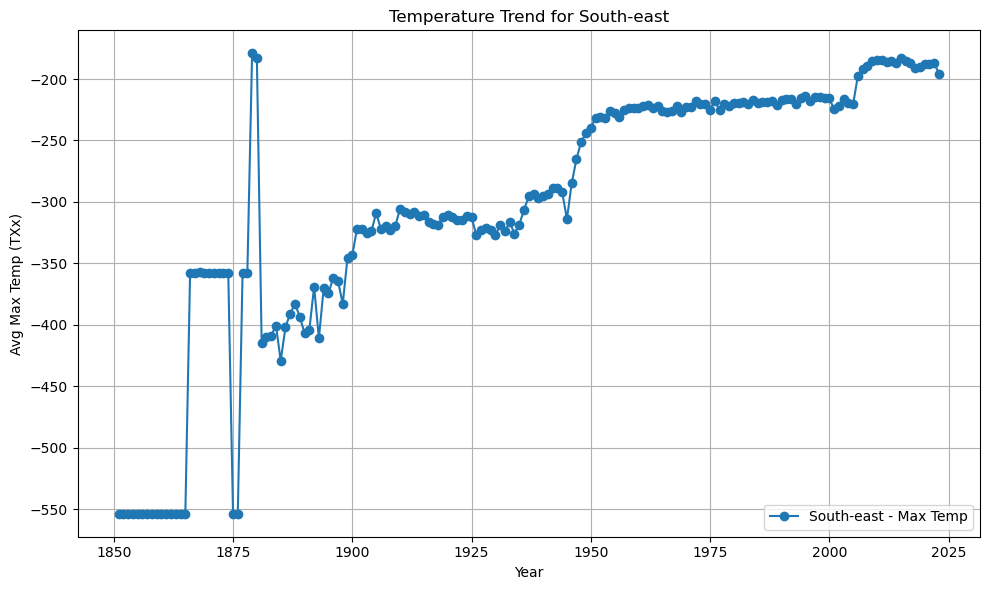

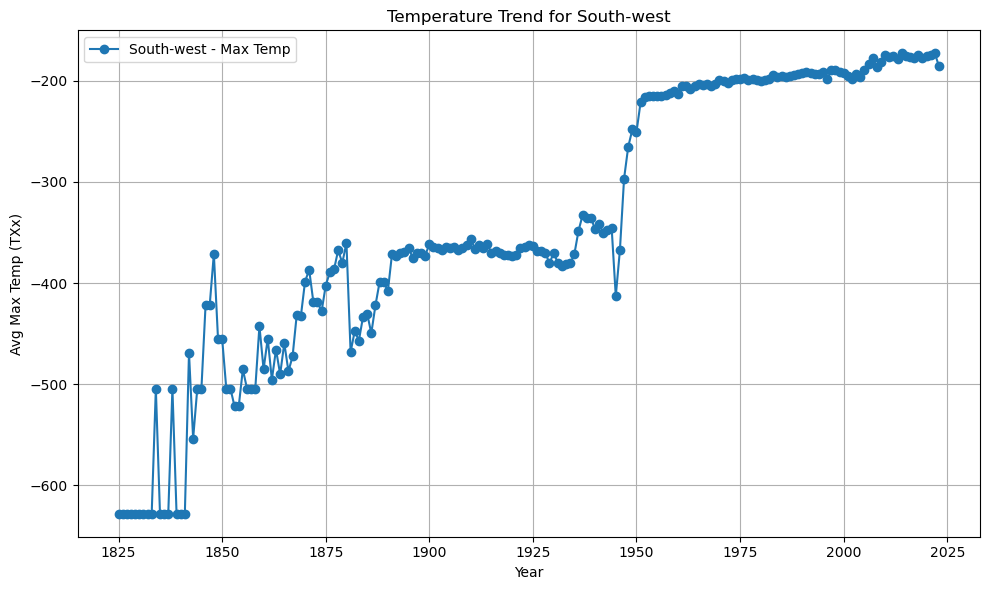

In [103]:
regions = regional_avg_by_year['Region'].unique()

for region in regions:
    # Filter data for the current region
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Create a figure for each region
    plt.figure(figsize=(10, 6))

    # Plot Temperature Trend
    plt.plot(region_data['Year'], region_data['Avg Max Temp'], marker='o', label=f'{region} - Max Temp')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Avg Max Temp (TXx)')
    plt.title(f'Temperature Trend for {region}')

    # Display legend and grid
    plt.legend(loc='best')
    plt.grid(True)

    # Adjust layout to fit everything nicely
    plt.tight_layout()

    # Display the plot
    plt.show()

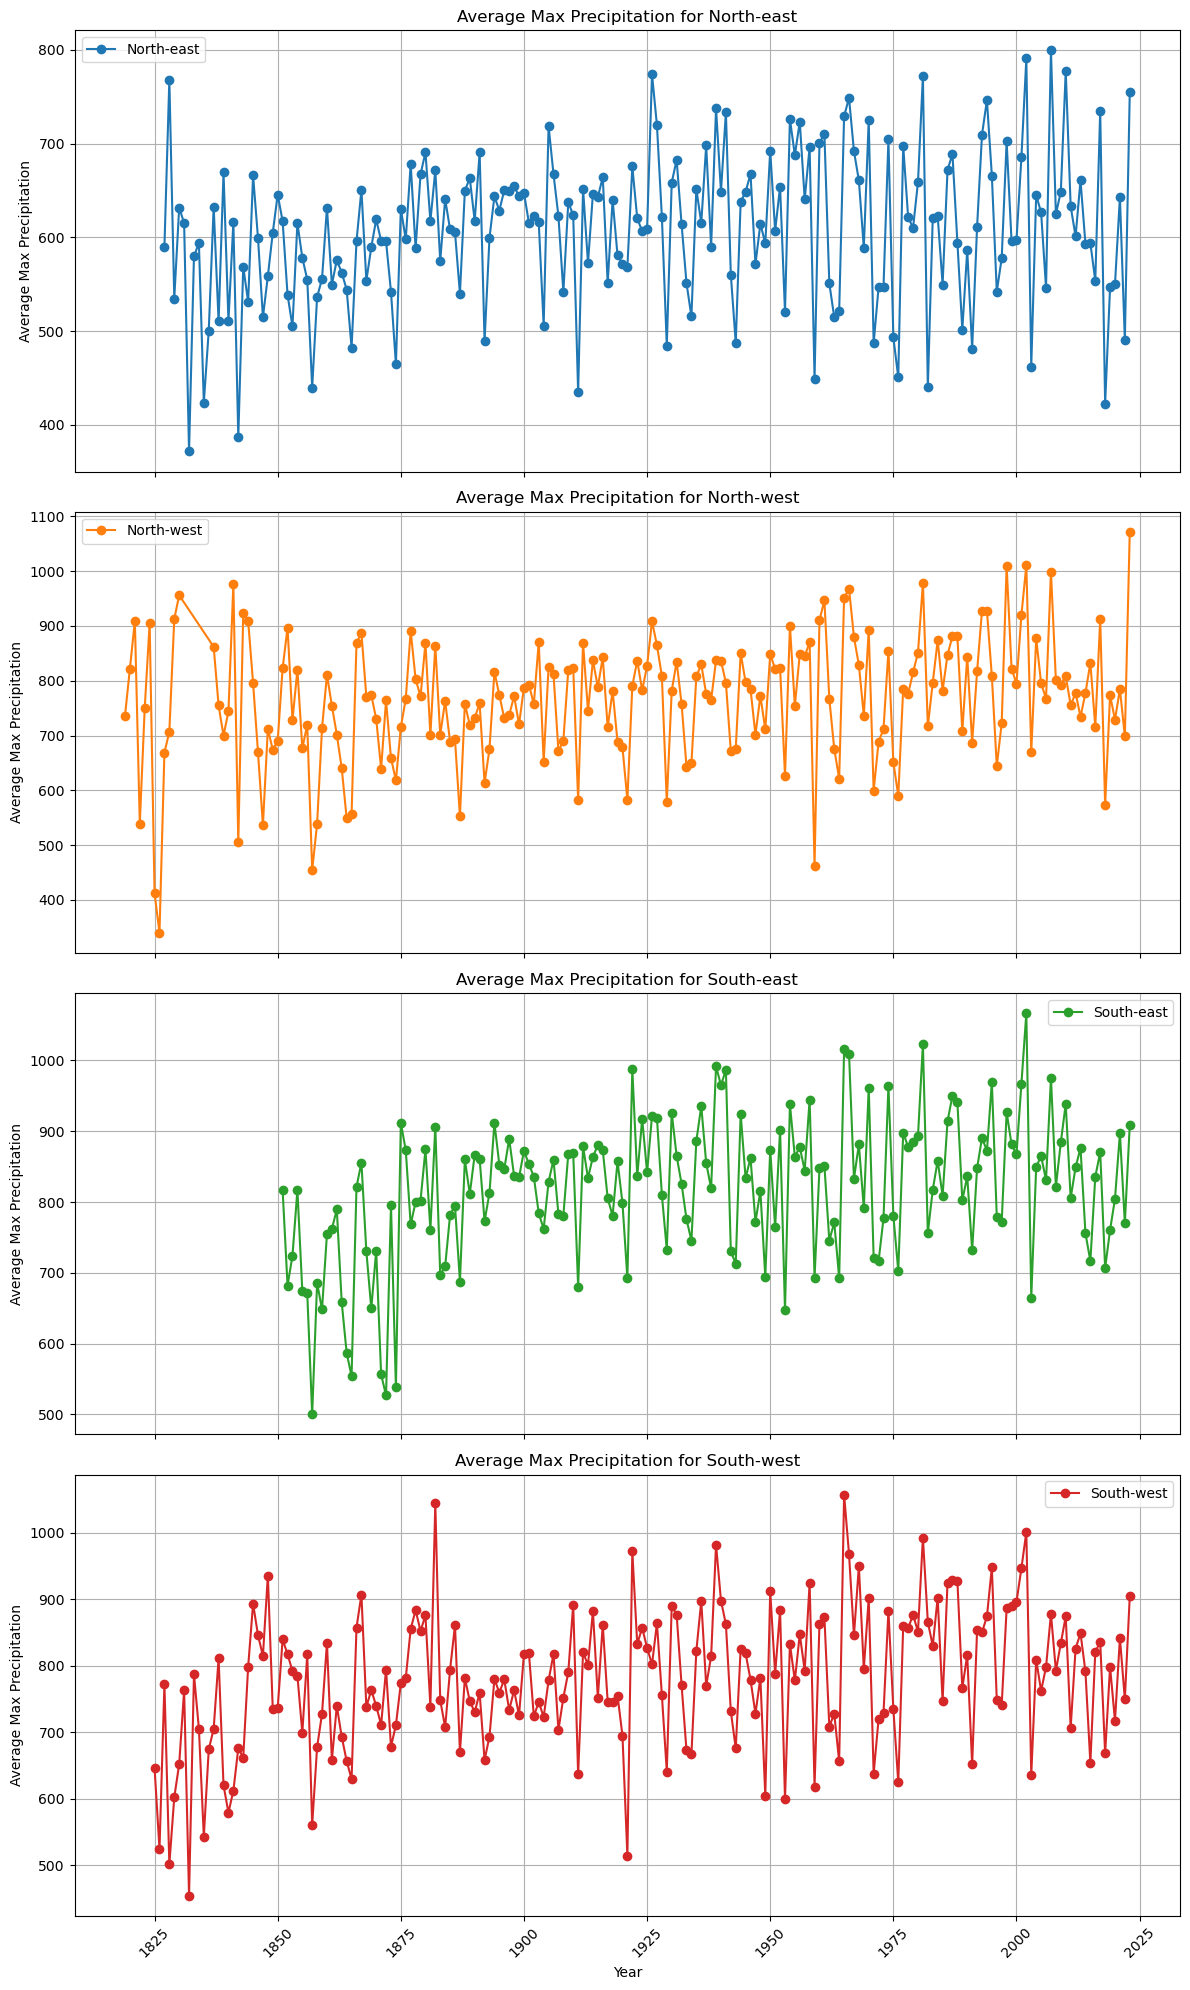

In [104]:
# Get unique regions and assign colors
regions = regional_avg_by_year['Region'].unique()
num_regions = len(regions)

# Define a color map
colors = plt.get_cmap('tab10')  # You can choose a colormap like 'tab10', 'viridis', etc.
color_list = colors(range(num_regions))

# Create subplots
fig, axes = plt.subplots(nrows=num_regions, ncols=1, figsize=(12, 5 * num_regions), sharex=True)

# Plot each region in a separate subplot with different colors
for i, (region, color) in enumerate(zip(regions, color_list)):
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]
    axes[i].plot(region_data['Year'], region_data['Avg Max Precipitation'], marker='o', color=color, label=region)
    axes[i].set_title(f'Average Max Precipitation for {region}')
    axes[i].set_ylabel('Average Max Precipitation')
    axes[i].grid(True)
    axes[i].legend(loc='best')

# Set common x-label
axes[-1].set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

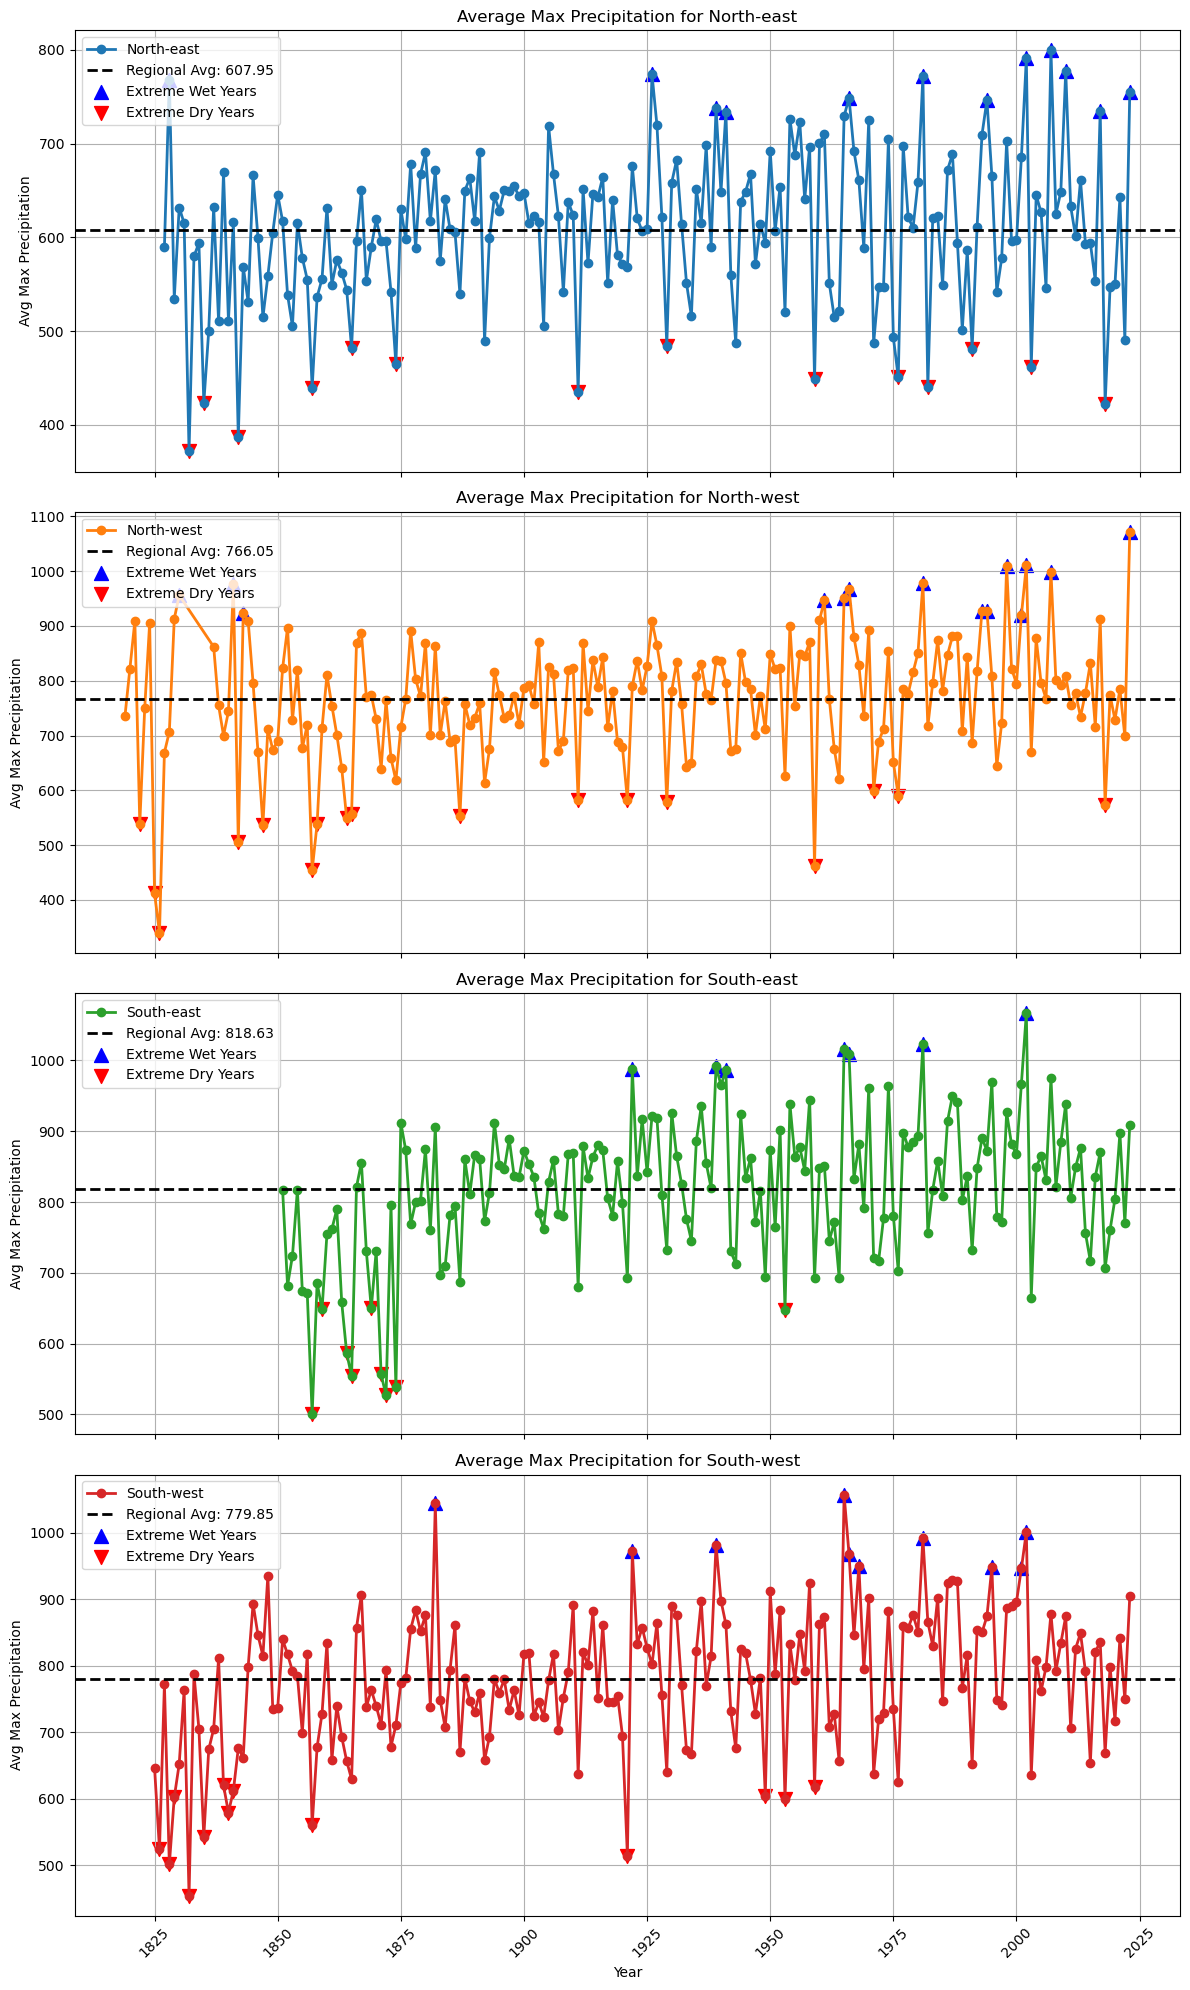

Region: North-east
Extreme Wet Years: [1828, 1926, 1939, 1941, 1966, 1981, 1994, 2002, 2007, 2010, 2017, 2023]
Extreme Dry Years: [1832, 1835, 1842, 1857, 1865, 1874, 1911, 1929, 1959, 1976, 1982, 1991, 2003, 2018]

Region: North-west
Extreme Wet Years: [1830, 1841, 1843, 1961, 1965, 1966, 1981, 1993, 1994, 1998, 2001, 2002, 2007, 2023]
Extreme Dry Years: [1822, 1825, 1826, 1842, 1847, 1857, 1858, 1864, 1865, 1887, 1911, 1921, 1929, 1959, 1971, 1976, 2018]

Region: South-east
Extreme Wet Years: [1922, 1939, 1941, 1965, 1966, 1981, 2002]
Extreme Dry Years: [1857, 1859, 1864, 1865, 1869, 1871, 1872, 1874, 1953]

Region: South-west
Extreme Wet Years: [1882, 1922, 1939, 1965, 1966, 1968, 1981, 1995, 2001, 2002]
Extreme Dry Years: [1826, 1828, 1829, 1832, 1835, 1839, 1840, 1841, 1857, 1921, 1949, 1953, 1959]



In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'regional_avg_by_year' is your DataFrame and 'average_precipitation_by_region'
# contains the baseline values for each region.

# Define the threshold percentage
threshold_percentage = 20 / 100  # 20%

# Example baseline values, assuming you have already calculated them
average_precipitation_by_region = pd.DataFrame({
    'Region': ['North-east', 'North-west', 'South-east', 'South-west'],
    'Avg Precipitation': [607.951707, 766.052560, 818.632216, 779.854544]
})

# Get unique regions
regions = regional_avg_by_year['Region'].unique()

# Define a color map
colors = plt.get_cmap('tab10')
color_list = colors(range(len(regions)))

# Create subplots
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(12, 5 * len(regions)), sharex=True)

# Dictionary to store the extreme years data
extreme_years = {}

# Plot each region in a separate subplot
for i, (region, color) in enumerate(zip(regions, color_list)):
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Plot yearly average max precipitation
    axes[i].plot(region_data['Year'], region_data['Avg Max Precipitation'], marker='o', color=color, label=region, linewidth=2)

    # Add baseline
    baseline = average_precipitation_by_region[average_precipitation_by_region['Region'] == region]['Avg Precipitation'].values[0]
    axes[i].axhline(y=baseline, color='black', linestyle='--', label=f'Regional Avg: {baseline:.2f}', linewidth=2)

    # Define thresholds
    extreme_wet_threshold = baseline * (1 + threshold_percentage)
    extreme_dry_threshold = baseline * (1 - threshold_percentage)

    # Highlight extreme wet years
    wet_years = region_data[region_data['Avg Max Precipitation'] > extreme_wet_threshold]
    axes[i].scatter(wet_years['Year'], wet_years['Avg Max Precipitation'], color='blue', marker='^', label='Extreme Wet Years', s=100)

    # Highlight extreme dry years
    dry_years = region_data[region_data['Avg Max Precipitation'] < extreme_dry_threshold]
    axes[i].scatter(dry_years['Year'], dry_years['Avg Max Precipitation'], color='red', marker='v', label='Extreme Dry Years', s=100)

    # Collect data for extreme years
    extreme_years[region] = {
        'Extreme Wet Years': wet_years['Year'].tolist(),
        'Extreme Dry Years': dry_years['Year'].tolist()
    }

    # Set plot details
    axes[i].set_title(f'Average Max Precipitation for {region}')
    axes[i].set_ylabel('Avg Max Precipitation')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Set common x-label
axes[-1].set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

# Print out the extreme years for each region
for region, years in extreme_years.items():
    print(f"Region: {region}")
    print(f"Extreme Wet Years: {years['Extreme Wet Years']}")
    print(f"Extreme Dry Years: {years['Extreme Dry Years']}")
    print()


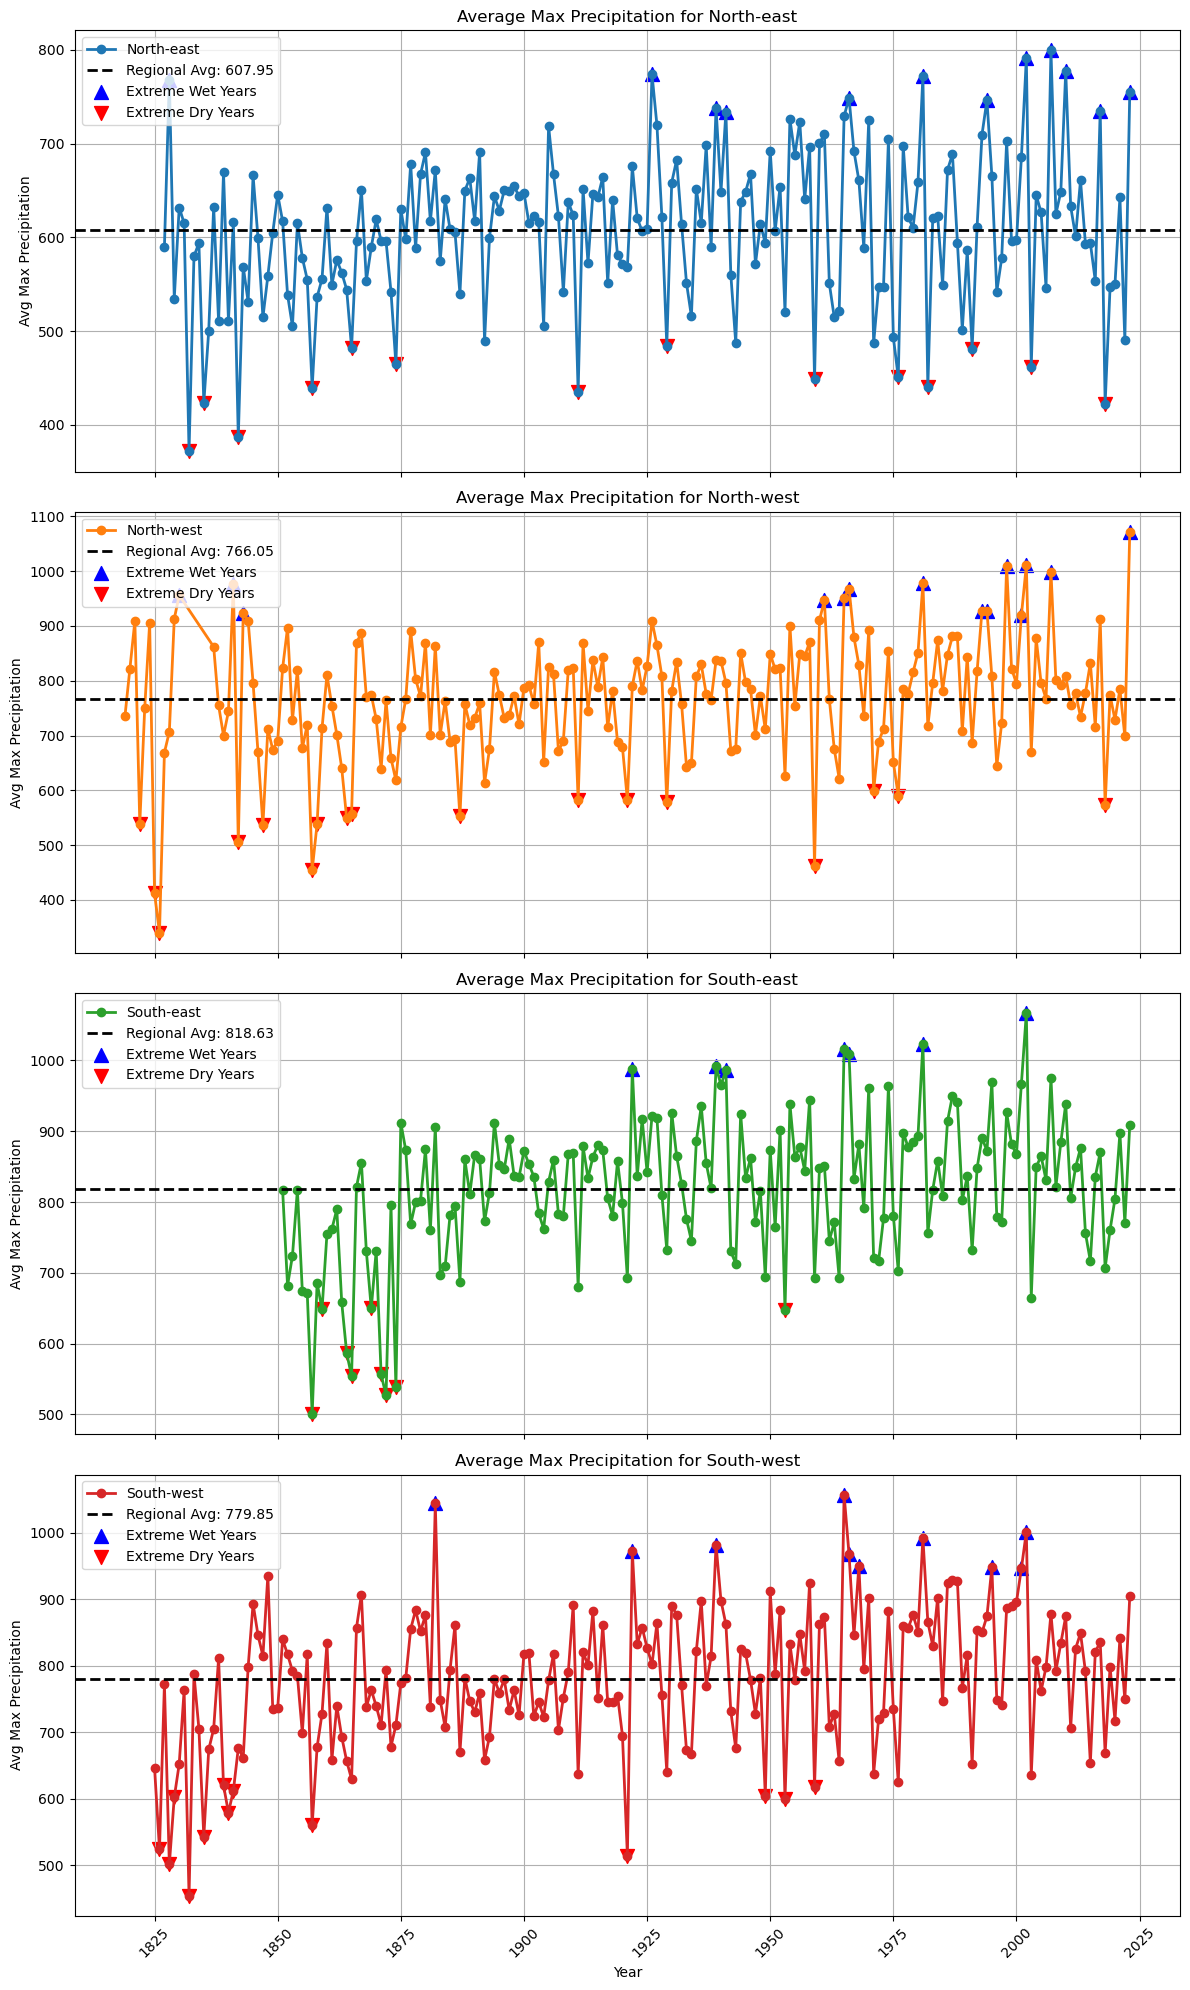

In [106]:
# Assuming 'regional_avg_by_year' is your DataFrame and 'average_precipitation_by_region'
# contains the baseline values for each region.

# Define the threshold percentage
threshold_percentage = 20 / 100  # 20%

# Example baseline values, assuming you have already calculated them
average_precipitation_by_region = pd.DataFrame({
    'Region': ['North-east', 'North-west', 'South-east', 'South-west'],
    'Avg Precipitation': [607.951707, 766.052560, 818.632216, 779.854544]
})

# Get unique regions
regions = regional_avg_by_year['Region'].unique()

# Define a color map
colors = plt.get_cmap('tab10')
color_list = colors(range(len(regions)))

# Create subplots
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(12, 5 * len(regions)), sharex=True)

# Plot each region in a separate subplot
for i, (region, color) in enumerate(zip(regions, color_list)):
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Plot yearly average max precipitation
    axes[i].plot(region_data['Year'], region_data['Avg Max Precipitation'], marker='o', color=color, label=region, linewidth=2)

    # Add baseline
    baseline = average_precipitation_by_region[average_precipitation_by_region['Region'] == region]['Avg Precipitation'].values[0]
    axes[i].axhline(y=baseline, color='black', linestyle='--', label=f'Regional Avg: {baseline:.2f}', linewidth=2)

    # Define thresholds
    extreme_wet_threshold = baseline * (1 + threshold_percentage)
    extreme_dry_threshold = baseline * (1 - threshold_percentage)

    # Highlight extreme wet years
    wet_years = region_data[region_data['Avg Max Precipitation'] > extreme_wet_threshold]
    axes[i].scatter(wet_years['Year'], wet_years['Avg Max Precipitation'], color='blue', marker='^', label='Extreme Wet Years', s=100)

    # Highlight extreme dry years
    dry_years = region_data[region_data['Avg Max Precipitation'] < extreme_dry_threshold]
    axes[i].scatter(dry_years['Year'], dry_years['Avg Max Precipitation'], color='red', marker='v', label='Extreme Dry Years', s=100)

    # Set plot details
    axes[i].set_title(f'Average Max Precipitation for {region}')
    axes[i].set_ylabel('Avg Max Precipitation')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

# Set common x-label
axes[-1].set_xlabel('Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



# Trend Analysis by Region

## Modified Mann Kendal Test

In [107]:
pip install pymannkendall


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [108]:

import pymannkendall as mk
# Rename the columns for clarity
regional_avg_by_year.columns = ['Region', 'Year', 'Avg Precipitation', 'Avg Max Temp']

# Get unique regions
regions = regional_avg_by_year['Region'].unique()

# Iterate over each region
for region in regions:
    # Extract data for the region
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Perform the Mann-Kendall test for PRCPTOT (precipitation)
    precip_result = mk.hamed_rao_modification_test(region_data['Avg Precipitation'].values)

    # Perform the Mann-Kendall test for TXx (maximum temperature)
    temp_result = mk.hamed_rao_modification_test(region_data['Avg Max Temp'].values)

    # Print the results along with the region name
    print(f"Region: {region}")
    print(f"Precipitation Mann-Kendall Test Result: {precip_result}")
    print(f"Temperature Mann-Kendall Test Result: {temp_result}")
    print("-" * 50)



Region: North-east
Precipitation Mann-Kendall Test Result: Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.010021432209877057, z=2.575088910675675, Tau=0.15000517973686936, s=2896.0, var_s=1263899.898261468, slope=0.32577009117921873, intercept=583.3217994729877)
Temperature Mann-Kendall Test Result: Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='no trend', h=False, p=0.05489720319348734, z=1.9196889313667884, Tau=0.2681549777271315, s=5177.0, var_s=7269872.825914168, slope=0.7300636406589759, intercept=-312.10174219012504)
--------------------------------------------------
Region: North-west
Precipitation Mann-Kendall Test Result: Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=1.3682202574250013e-05, z=4.3489000858186735, Tau=0.1617684381503477, s=3187.0, var_s=536701.3440000796, slope=0.4667624521072802, intercept=727.9603285621339)
Temperature Mann-Kendall Test Result: Modified_Mann_Kendall_Test_Hamed_Rao_Approach(tren

       Region Precipitation Trend  Precipitation p-value  Precipitation Tau  \
0  North-east          increasing           1.002143e-02           0.150005   
1  North-west          increasing           1.368220e-05           0.161768   
2  South-east          increasing           4.123889e-05           0.230138   
3  South-west          increasing           4.243522e-07           0.248465   

  Temperature Trend  Temperature p-value  Temperature Tau  
0          no trend         5.489720e-02         0.268155  
1        increasing         2.940814e-09         0.696411  
2        increasing         4.640628e-09         0.812004  
3        increasing         1.476597e-13         0.857215  


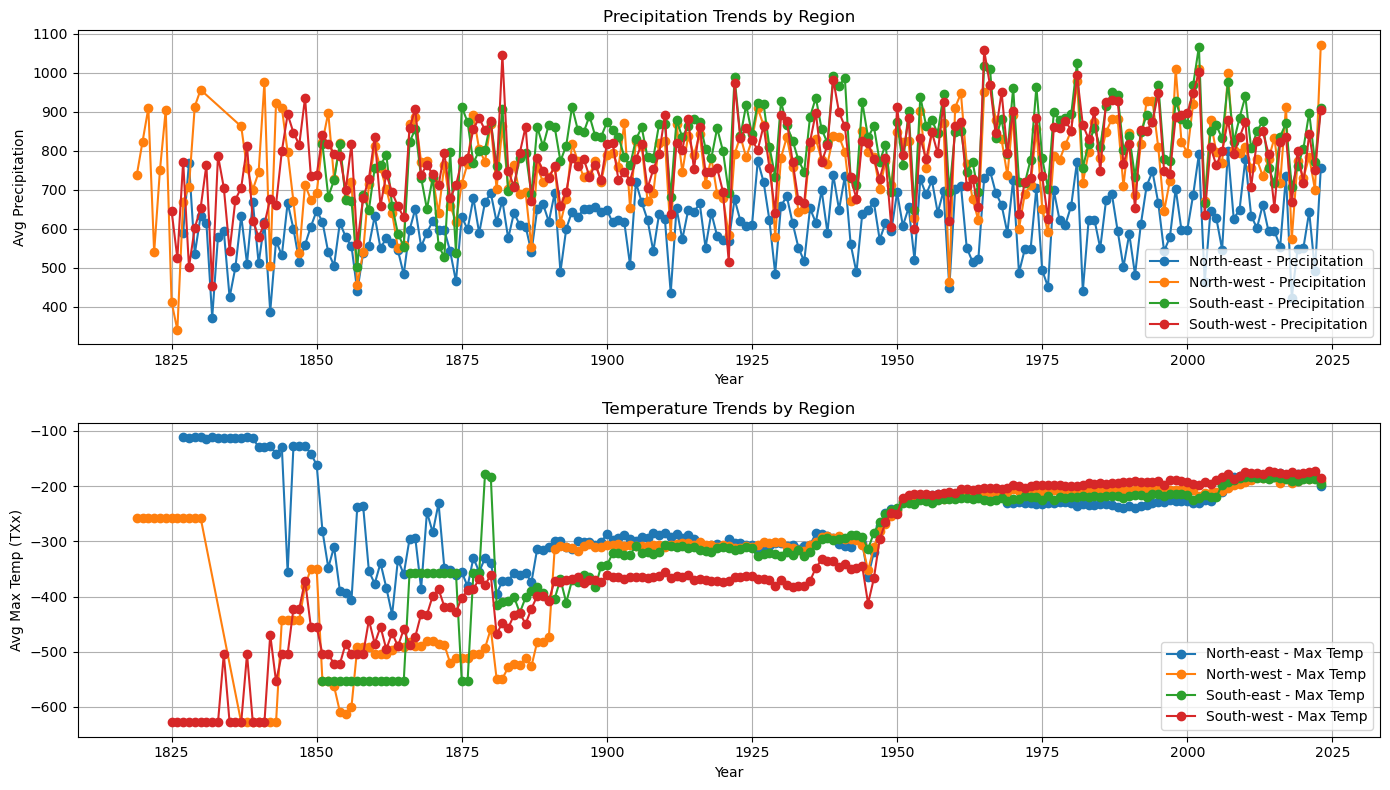

In [109]:


# Assuming regional_avg_by_year is your DataFrame with the columns:
# ['Region', 'Year', 'Avg Precipitation', 'Avg Max Temp']

# Get unique regions
regions = regional_avg_by_year['Region'].unique()

# Initialize an empty list to store the results
trend_results = []

# Iterate over each region
for region in regions:
    # Extract data for the region
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Perform the Mann-Kendall test for PRCPTOT (precipitation)
    precip_result = mk.hamed_rao_modification_test(region_data['Avg Precipitation'].values)

    # Perform the Mann-Kendall test for TXx (maximum temperature)
    temp_result = mk.hamed_rao_modification_test(region_data['Avg Max Temp'].values)

    # Append the results to the list
    trend_results.append({
        'Region': region,
        'Precipitation Trend': precip_result.trend,
        'Precipitation p-value': precip_result.p,
        'Precipitation Tau': precip_result.Tau,
        'Temperature Trend': temp_result.trend,
        'Temperature p-value': temp_result.p,
        'Temperature Tau': temp_result.Tau
    })

# Convert trend_results to a DataFrame for better readability
trend_results_df = pd.DataFrame(trend_results)

# Display the trend results
print(trend_results_df)

# Step 3: Plot the Trends for each region
plt.figure(figsize=(14, 8))

for region in regions:
    region_data = regional_avg_by_year[regional_avg_by_year['Region'] == region]

    # Plot Precipitation Trend
    plt.subplot(2, 1, 1)
    plt.plot(region_data['Year'], region_data['Avg Precipitation'], marker='o', label=f'{region} - Precipitation')
    plt.xlabel('Year')
    plt.ylabel('Avg Precipitation')
    plt.title('Precipitation Trends by Region')
    plt.legend(loc='best')
    plt.grid(True)

    # Plot Temperature Trend
    plt.subplot(2, 1, 2)
    plt.plot(region_data['Year'], region_data['Avg Max Temp'], marker='o', label=f'{region} - Max Temp')
    plt.xlabel('Year')
    plt.ylabel('Avg Max Temp (TXx)')
    plt.title('Temperature Trends by Region')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()
